In [478]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.express as px
from matplotlib.image import imread
from keras.preprocessing.image import img_to_array
from numpy import asarray

#ignore warnings of python
import warnings
warnings.filterwarnings('ignore')

## Part 1 : Familiarity with the dataset

- In this part we will present an initial introduction with the data.<br>
  We will represent the shape of the data ,in addition, we will present the data visually.

the shape of the image : Shape.10 is :  (925, 1381, 3)
the shape of the image : Shape.11 is :  (925, 1381, 3)
the shape of the image : Shape.12 is :  (925, 1381, 3)
the shape of the image : Shape.13 is :  (925, 1381, 3)
the shape of the image : Shape.15 is :  (925, 1381, 3)
the shape of the image : Shape.16 is :  (925, 1381, 3)
the shape of the image : Shape.17 is :  (925, 1381, 3)
the shape of the image : Shape.18 is :  (925, 1381, 3)
the shape of the image : Shape.20 is :  (925, 1381, 3)


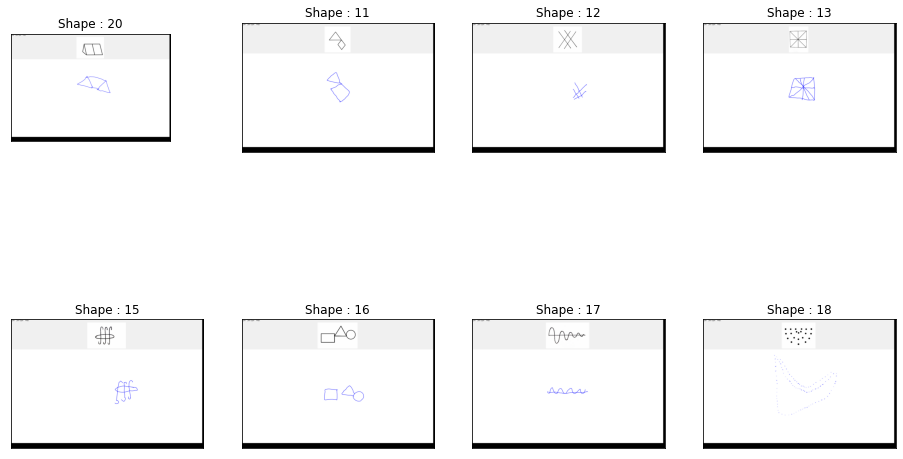

In [479]:
# plot the randomly a few images of the DATA
folder = '/Users/twmrgwzln/Downloads/train/7574/SimpleTest/'
img_range = [int(x) for x in np.linspace(start = 10, stop = 20, num = 9)]
plt.figure(figsize=(20,10))
for i in img_range:
    plt.subplot(240 + 1 + i)
    filename = folder  + str(i) + '.png'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Shape : ' + str(i))
    plt.xticks([])
    plt.yticks([])
    print(f"the shape of the image : {'Shape.' + str(i)} is : " , image.shape)

plt.show()

## Continue Part 1 : Familiarity with the dataset (Shape 6)

- We will now focus specifically and present the data for it.<br>
  It is important to note that for each image there is such data.

the shape of the image 16 :  (925, 1381)


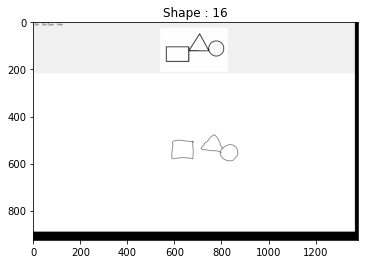

In [480]:
folder = '/Users/twmrgwzln/Downloads/train/7574/SimpleTest/16.png'
shape_16 = cv2.imread(folder,0)
plt.imshow(shape_16 ,cmap = 'gist_gray')
plt.title('Shape : 16')
print(f"the shape of the image 16 : " , shape_16.shape)
plt.show()

In [1438]:
# Upload the data of the image 16
df_16 = pd.read_csv("/Users/twmrgwzln/Downloads/train/7574/SimpleTest/16.csv")
df_16

,X,Y,Pressure,TiltX,TiltY,Time
0,854.145,578.106667,0.275391,5416.0,7612.0,00:01.7661611
1,854.715,578.233333,0.280029,5416.0,7612.0,00:01.7817822
2,855.4275,578.486667,0.339844,5416.0,7612.0,00:01.7817822
3,855.855,578.613333,0.358154,5416.0,7612.0,00:01.7974035
4,856.8525,578.486667,0.426758,5416.0,7612.0,00:01.8130289
...,...,...,...,...,...,...
701,678.7275,507.173333,0.987793,5266.0,9834.0,00:15.9335980
702,678.3,507.553333,0.963379,5266.0,9834.0,00:15.9491880
703,677.3025,509.073333,0.872070,5266.0,9834.0,00:15.9645889
704,Time Elapsed till drawing started: 00:01.7661611,NaN,NaN,NaN,NaN,NaN


In [1439]:
# check the type of every columns
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          706 non-null    object 
 1    Y         704 non-null    float64
 2    Pressure  704 non-null    float64
 3    TiltX     704 non-null    float64
 4    TiltY     704 non-null    float64
 5    Time      704 non-null    object 
dtypes: float64(4), object(2)
memory usage: 33.2+ KB


In [1440]:
# calculating some statistical data
df_16.describe()

,Y,Pressure,TiltX,TiltY
count,704.000000,704.000000,704.000000,704.000000
mean,535.701402,0.910631,5558.218750,8628.735795
std,33.024480,0.159936,565.058124,444.326010
min,478.673333,0.087891,4794.000000,7612.000000
25%,507.173333,0.894958,5218.000000,8235.250000
50%,534.470000,0.986816,5334.000000,8714.000000
75%,573.230000,1.000000,5642.000000,8905.000000
max,589.126667,1.000000,7121.000000,9834.000000


In [1441]:
# Look for the features of the DataFrame
df_16.columns

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')

In [1442]:
# check null values
df_16.isnull().sum().sum()

10

## Part 2 : Organize the DataFrame (Shape 16)

- In this section we will arrange the data table, we will start by deleting missing values and then we will add a data frame <br> whose job is to estimate the amount of time.<br>
Then we will continue to rename the features because there is a space at the beginning of each feature.<br>
And finally change the X feature type to float instad of object .

In [1443]:
# Organize the table
df_sum_time_16 = df_16.iloc[-2:]
df_sum_time_16.drop([' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], axis=1, inplace=True)
df_sum_time_16.rename(columns = {'X':'sum_time'}, inplace = True)

In [1444]:
df_sum_time_16

,sum_time
704,Time Elapsed till drawing started: 00:01.7661611
705,Time Elapsed till drawing submit: 00:20.6346923


In [1445]:
# drop last 2 rows
df_16.drop(df_16.tail(2).index,inplace=True)

In [1446]:
df_16.tail(2)

,X,Y,Pressure,TiltX,TiltY,Time
702,678.3,507.553333,0.963379,5266.0,9834.0,00:15.9491880
703,677.3025,509.073333,0.872070,5266.0,9834.0,00:15.9645889


In [1447]:
df_16.isnull().sum().sum()

0

In [1448]:
# Remove the space at the beginnig of the columns name
df_16.columns = ['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time']
df_16.columns

Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

In [1449]:
# Change the type of feature X
df_16["X"] = df_16.X.astype(float)
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 703
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         704 non-null    float64
 1   Y         704 non-null    float64
 2   Pressure  704 non-null    float64
 3   TiltX     704 non-null    float64
 4   TiltY     704 non-null    float64
 5   Time      704 non-null    object 
dtypes: float64(5), object(1)
memory usage: 38.5+ KB


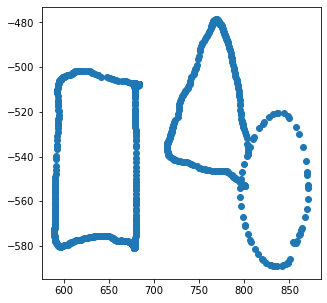

In [1450]:
# Method to Plot the relevent drawing 
plt.figure (figsize = (5,5))
plt.plot(df_16['X'],-df_16['Y'],'o')
ax.set_ylabel('Y - Value')
ax.set_xlabel('X - Value')
plt.axis();

## Part 3 :  Algorithm (Shape 16)

#1. Algorithm to find How many **lines** are there in the picture

In [1321]:
def InclineList (X_point,Y_point):
    counter = 0 ; 
    n_range = [int(x) for x in np.linspace(start = 0, stop = len(X_point), num = len(X_point))]
    # Calculating the Incline of the every consecutive points
    Incline_list = [] 
    for i in n_range:
         if(i+1<len(X_point)):
            Incline = ((Y_point[i+1] - Y_point[i]) / (X_point[i+1] - X_point[i]))
            Incline_list.append(Incline)
    Incline_list = asarray(Incline_list)
    Incline_list = Incline_list[~np.isnan(Incline_list)]
    Incline_list = Incline_list[~np.isinf(Incline_list)]
    return Incline_list

#2. Algorithm to find the **length of the line** and the **average pressure** applied by pressing

#3. Algorithm to find how many times **Raised his hand** during the painting

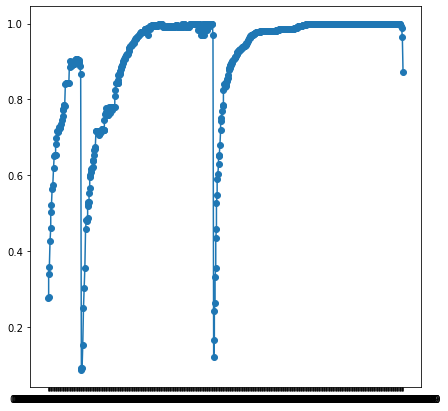

In [711]:
# Plot of present the hand rasies in timeline
plt.figure (figsize = (7,7))
plt.plot(df_16['Time'],df_16['Pressure'],'-o')

In [712]:
# The Algorithm With pressureThreshold of 0.5
def count_hand_raises(df):
    downs=0
    pressureThreshold = 0.5 
    for index, row in df.iterrows():
        if index > 0:
            currentValue = df['Pressure'][index]
            previousValue = df['Pressure'][index -1]
            if (previousValue - currentValue > pressureThreshold):
                downs += 1 
    return downs       

In [713]:
# Implementation of the algorithm
handLifts = count_hand_raises(df_16)  
print('Hand was lifted', handLifts, 'times')

Hand was lifted 2 times


#4. Algorithm to find Is the shape **open** or **closed**

In [714]:
def CloseOrOpen(df):
    first_x = df.head(1).X
    last_x = df.tail(1).X
    first_y = df.head(1).Y
    last_y = df.tail(1).Y
    first_point = [first_x,first_y]
    last_point=[last_x,last_y]
    treshold = 10
    dis = math.dist(first_point,last_point)
    if (dis > treshold):
        print("The Shape is Open")
    else:
         print("The Shape is Closed")

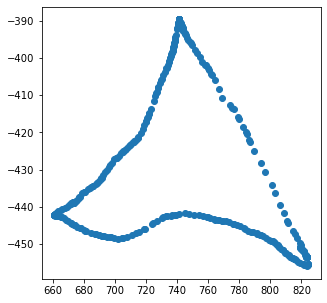

In [1437]:
# Check The method on shape 4.png
plt.figure (figsize = (5,5))
plt.plot(df_16['X'],-df_16['Y'],'o')

In [729]:
CloseOrOpen(df_4)

The Shape is Closed


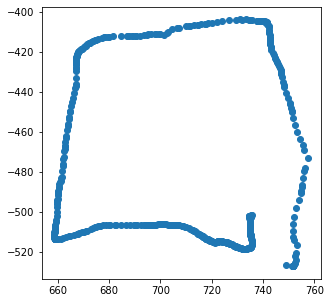

In [1408]:
# Check The method on shape 6.png
plt.figure (figsize = (5,5))
plt.plot(df_16['X'],-df_16['Y'],'o')

In [743]:
CloseOrOpen(df_6)

The Shape is Open
